<center>
  <h1>MAESTRÍA EN MATEMÁTICAS APLICADAS Y CIENCIAS DE LA COMPUTACIÓN - MACC</h1>
  <h2>UNIVERSIDAD DEL ROSARIO</h2>
  <h3>Diego Alberto Rodríguez Cruz</h3>
</center>

---

# Taller

El objetivo es contruir un clasificador de random Forest, junto con una validación de OOB para la variable Swarm_Behaviour. Se debe presentar un archivo .ipynb
con la descripción de los pasos llevados a cabo y la selección de variables más importantes.


* Los datos: https://www.kaggle.com/datasets/deepcontractor/swarm-behaviour-classification?select=Swarm_Behaviour.csv.

**Context**

Flocking behaviour refers to the way that groups of birds, insects, fish, or other animals, move close to each other. They are able to move as a group with the same velocity, yet without running into each other.

**Task**

Binary Classification, classify the behaviour of the swarm.
Class labels are binary, which 1 refers to flocking, grouped, and aligned, and 0 refers to not flocking, not grouped, and not aligned.

* Target Variable: Swarm_Behaviour
* Data Type: High Dimensional
* Classification Type: Binary Classificarion

Leer de [acá](http://archive.ics.uci.edu/dataset/524/swarm+behaviour)

# Librerías

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
### Los arboles de random Forest
### Bagging
from sklearn.ensemble import RandomForestClassifier ### El importante
from sklearn.ensemble import RandomForestRegressor### El importante
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Carga de Datos Swarm Behaviour


In [2]:
#url="http://archive.ics.uci.edu/dataset/524/swarm+behaviour"
url="/content/Swarm_Behaviour.csv"
#swarm=pd.read_csv(url, sep=",", index_col=0)
swarm=pd.read_csv('/content/Swarm_Behaviour.csv')
Y=swarm["Swarm_Behaviour"]
X=swarm.drop("Swarm_Behaviour", axis=1)
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, stratify=Y)

# Análisis Exploratorio de Datos (EDA en Inglés)

In [3]:
swarm.head(10)

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.00,0.00,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.0,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.00,0.00,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.0,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.00,0.00,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.3,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.00,0.00,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.0,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.00,0.00,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.0,12,0,0.0
5,565.45,-18.35,4.63,-5.22,0.00,0.00,-0.56,-0.05,0.29,-0.14,...,-7.98,0.00,0.00,0.00,0.00,-0.32,0.0,6,0,0.0
6,608.66,997.24,11.84,2.77,0.31,-0.08,0.00,0.00,0.00,0.00,...,-2.67,-0.04,-0.09,0.00,0.00,-0.03,0.0,3,1,0.0
7,-653.42,-74.17,-5.23,-3.32,1.00,0.00,0.00,0.00,0.00,0.00,...,11.47,1.00,-1.00,0.00,0.00,0.00,0.0,20,0,0.0
8,379.82,-456.68,10.41,13.47,0.00,1.00,3.23,-0.23,0.00,0.00,...,17.38,0.00,1.00,0.00,0.00,0.00,0.0,15,0,0.0
9,-1284.63,-517.84,-12.25,-12.40,0.00,-1.00,0.00,0.00,0.00,0.00,...,-6.31,-1.00,0.00,0.00,0.00,0.00,0.0,15,0,0.0


In [4]:
#descripción estadística de datos
swarm.describe()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
count,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,...,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000
mean,104.413631,-73.481853,-0.697607,0.061480,-0.147964,0.152034,-1.055732,-0.731546,-0.034915,0.077123,...,0.086824,-0.126276,0.127497,-1.526260,-0.118891,-0.012388,0.085076,26.433995,2.130679,0.341242
std,843.200079,573.329374,6.427840,7.366739,0.376078,0.588582,26.388570,20.684183,0.559690,0.628478,...,7.683539,0.378830,0.570589,73.903764,7.002853,0.555143,0.614603,34.136098,7.431911,0.474136
min,-1414.140000,-1012.180000,-18.590000,-18.410000,-1.000000,-1.000000,-944.070000,-847.910000,-2.680000,-2.680000,...,-18.440000,-1.040000,-1.000000,-4079.230000,-370.240000,-2.680000,-2.680000,0.000000,0.000000,0.000000
25%,-542.020000,-611.220000,-5.360000,-5.680000,-0.230000,-0.010000,0.000000,0.000000,-0.040000,-0.020000,...,-5.600000,-0.190000,0.000000,0.000000,0.000000,-0.070000,0.000000,2.000000,0.000000,0.000000
50%,145.300000,-157.350000,-0.450000,-1.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
75%,896.200000,425.700000,3.940000,7.260000,0.000000,0.940000,0.000000,0.000000,0.000000,0.020000,...,7.480000,0.000000,0.540000,0.000000,0.000000,0.000000,0.030000,35.000000,1.000000,1.000000
max,1406.080000,1015.800000,18.470000,18.570000,1.000000,1.040000,68.560000,234.740000,2.680000,2.680000,...,18.490000,1.000000,1.040000,255.990000,57.840000,2.680000,2.680000,142.000000,64.000000,1.000000


In [5]:
#Conteo de variables nulas/sin información
swarm.isnull().sum()

x1                 0
y1                 0
xVel1              0
yVel1              0
xA1                0
                  ..
xC200              0
yC200              0
nAC200             0
nS200              0
Swarm_Behaviour    0
Length: 2401, dtype: int64

In [6]:
swarm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23309 entries, 0 to 23308
Columns: 2401 entries, x1 to Swarm_Behaviour
dtypes: float64(2001), int64(400)
memory usage: 427.0 MB


In [7]:
#Dimension del df (registros, columnas)
swarm.shape

(23309, 2401)

In [9]:
swarm.groupby("Swarm_Behaviour").size()

Swarm_Behaviour
0.0    15355
1.0     7954
dtype: int64

# Random Forest


In [10]:
RF= RandomForestClassifier(min_samples_leaf=1, n_estimators=100)
### La selección se hace de manera aleatoria
RF.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
y_pred=RF.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     12284
         1.0       0.95      0.94      0.95      6363

    accuracy                           0.96     18647
   macro avg       0.96      0.96      0.96     18647
weighted avg       0.96      0.96      0.96     18647



In [12]:
y_pred=RF.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      3071
         1.0       0.80      0.82      0.81      1591

    accuracy                           0.87      4662
   macro avg       0.85      0.86      0.86      4662
weighted avg       0.87      0.87      0.87      4662



## Árboles a usar

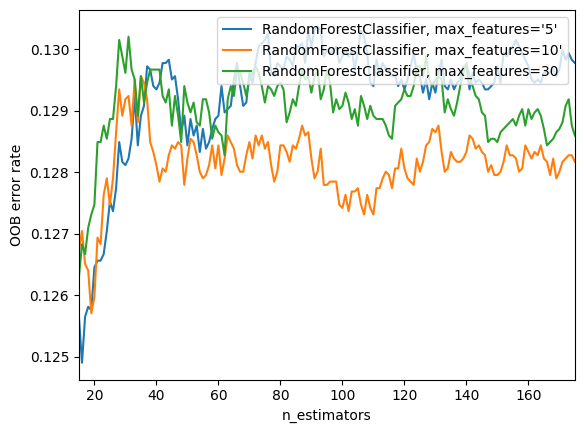

In [13]:
%%time

from collections import OrderedDict
RANDOM_STATE=20
ensemble_RF= [
    ("RandomForestClassifier, max_features='5'",
        RandomForestClassifier(warm_start=True,
                               max_features=5,
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='10'",
        RandomForestClassifier(warm_start=True,
                               max_features=10,
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='30'",
        RandomForestClassifier(warm_start=True,
                               max_features=30,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_RF)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_RF:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [14]:
RF= RandomForestClassifier(min_samples_leaf=5,max_features=5, n_estimators=75) ### Lo mas pequeño del gráfico anterior
RF.fit(X_train, y_train)

RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=75)

In [15]:
y_pred=RF.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     12284
         1.0       0.94      0.93      0.94      6363

    accuracy                           0.96     18647
   macro avg       0.95      0.95      0.95     18647
weighted avg       0.96      0.96      0.96     18647



In [16]:
y_pred=RF.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      3071
         1.0       0.81      0.83      0.82      1591

    accuracy                           0.88      4662
   macro avg       0.86      0.86      0.86      4662
weighted avg       0.88      0.88      0.88      4662



## Importancia de las variables

Una variable es importante si aparece en muchos árboles y en las primeras posiciones

Ranking de Variables:
1. feature 921 (0.012000)
2. feature 93 (0.008979)
3. feature 2288 (0.008042)
4. feature 1277 (0.007606)
5. feature 1700 (0.007183)
6. feature 117 (0.006708)
7. feature 506 (0.006455)
8. feature 165 (0.006268)
9. feature 836 (0.005960)
10. feature 1857 (0.005517)
11. feature 669 (0.005479)
12. feature 1053 (0.005197)
13. feature 344 (0.005138)
14. feature 2073 (0.005038)
15. feature 957 (0.005016)
16. feature 2337 (0.004967)
17. feature 2253 (0.004945)
18. feature 1217 (0.004935)
19. feature 32 (0.004836)
20. feature 1029 (0.004833)
21. feature 470 (0.004822)
22. feature 2181 (0.004716)
23. feature 2085 (0.004707)
24. feature 668 (0.004581)
25. feature 1977 (0.004537)
26. feature 1341 (0.004536)
27. feature 1533 (0.004470)
28. feature 2301 (0.004433)
29. feature 273 (0.004363)
30. feature 1797 (0.004284)
31. feature 1953 (0.004152)
32. feature 585 (0.004152)
33. feature 1853 (0.004127)
34. feature 2031 (0.004118)
35. feature 74 (0.004091)
36. feature 2093 (0.00409

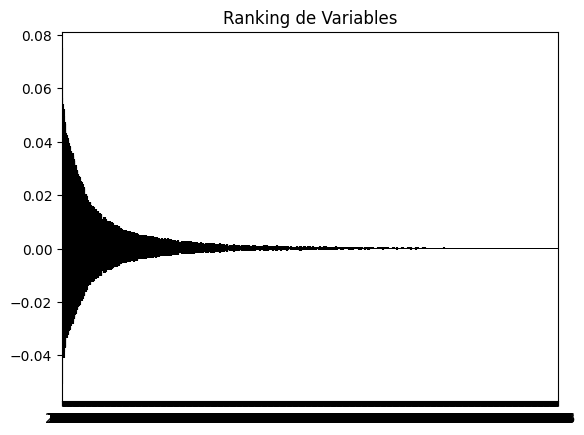

In [17]:
importancias = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = np.argsort(importancias)[::-1]

# Print the feature ranking
print("Ranking de Variables:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importancias[indices[f]]))

plt.figure()
plt.title("Ranking de Variables")
plt.bar(range(X.shape[1]), importancias[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [18]:
Impor=pd.DataFrame(importancias, index=X_train.columns)
Impor.sort_values(by=0,  ascending=False)

,0
yC77,0.012000
yC8,0.008979
xC191,0.008042
yA107,0.007606
xC142,0.007183
...,...
nS5,0.000003
nAC179,0.000002
nS172,0.000002
xC44,0.000001


In [30]:
confusion_matrix(y_test, y_pred)

array([[2760,  311],
       [ 270, 1321]])

# Regresión con Random Forest

La documentación [acá](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)


In [19]:
%%time

RFR=RandomForestRegressor(n_estimators=100,min_weight_fraction_leaf=0.05)  ## Para evitar sobreajuste
RFR.fit(X_train, y_train)

RandomForestRegressor(min_weight_fraction_leaf=0.05)

In [20]:
%%time
RFR.estimators_

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 12.6 µs


[DecisionTreeRegressor(max_features=1.0, min_weight_fraction_leaf=0.05,
                       random_state=912550353),
 DecisionTreeRegressor(max_features=1.0, min_weight_fraction_leaf=0.05,
                       random_state=530342077),
 DecisionTreeRegressor(max_features=1.0, min_weight_fraction_leaf=0.05,
                       random_state=1903213364),
 DecisionTreeRegressor(max_features=1.0, min_weight_fraction_leaf=0.05,
                       random_state=1200198988),
 DecisionTreeRegressor(max_features=1.0, min_weight_fraction_leaf=0.05,
                       random_state=226177378),
 DecisionTreeRegressor(max_features=1.0, min_weight_fraction_leaf=0.05,
                       random_state=1906851479),
 DecisionTreeRegressor(max_features=1.0, min_weight_fraction_leaf=0.05,
                       random_state=1606705058),
 DecisionTreeRegressor(max_features=1.0, min_weight_fraction_leaf=0.05,
                       random_state=547942125),
 DecisionTreeRegressor(max_features=

In [21]:
%%time

from sklearn import tree
arbol1=tree.DecisionTreeRegressor(max_features='auto', min_weight_fraction_leaf=0.05,
                       random_state=53690382)
arbol1.fit(X_train, y_train)

CPU times: user 12 s, sys: 226 ms, total: 12.2 s
Wall time: 12.2 s


DecisionTreeRegressor(max_features='auto', min_weight_fraction_leaf=0.05,
                      random_state=53690382)

In [22]:
pred_train=RFR.predict(X_train)
print("El R2 de entrenamiento es ",100*np.round(r2_score(y_train, pred_train),4), "%")
pred_test=RFR.predict(X_test)
print("El R2 de prueba es ",100*np.round(r2_score(y_test, pred_test),4), "%")

El R2 de entrenamiento es  74.82 %
El R2 de prueba es  74.13 %


Ranking de Variables:
1. feature 1700 (0.401336)
2. feature 452 (0.185777)
3. feature 626 (0.058009)
4. feature 1131 (0.037792)
5. feature 1490 (0.033379)
6. feature 1191 (0.032432)
7. feature 921 (0.029200)
8. feature 729 (0.025090)
9. feature 2253 (0.017691)
10. feature 2213 (0.012861)
11. feature 2349 (0.010618)
12. feature 758 (0.010238)
13. feature 2093 (0.009151)
14. feature 2021 (0.008677)
15. feature 2195 (0.007673)
16. feature 1133 (0.007173)
17. feature 2006 (0.006807)
18. feature 1280 (0.006614)
19. feature 1949 (0.004897)
20. feature 1533 (0.004767)
21. feature 1857 (0.004431)
22. feature 2313 (0.004055)
23. feature 353 (0.003746)
24. feature 1226 (0.003154)
25. feature 561 (0.002924)
26. feature 608 (0.002839)
27. feature 1401 (0.002716)
28. feature 2002 (0.002536)
29. feature 1772 (0.002377)
30. feature 1130 (0.002349)
31. feature 1534 (0.002247)
32. feature 358 (0.002090)
33. feature 970 (0.002037)
34. feature 2050 (0.001684)
35. feature 1258 (0.001672)
36. feature 1294 

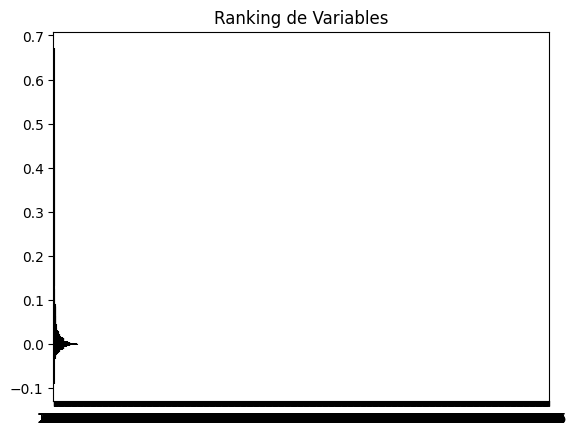

In [23]:
importancias = RFR.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFR.estimators_],
             axis=0)
indices = np.argsort(importancias)[::-1]

# Print the feature ranking
print("Ranking de Variables:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importancias[indices[f]]))

plt.figure()
plt.title("Ranking de Variables")
plt.bar(range(X.shape[1]), importancias[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [24]:
Impor=pd.DataFrame(importancias, index=X_train.columns)
Impor.sort_values(by=0,  ascending=False)

,0
xC142,0.401336
xC38,0.185777
xVel53,0.058009
yVel95,0.037792
xVel125,0.033379
...,...
nAC70,0.000000
yC70,0.000000
xC70,0.000000
yS70,0.000000


## OOB validación

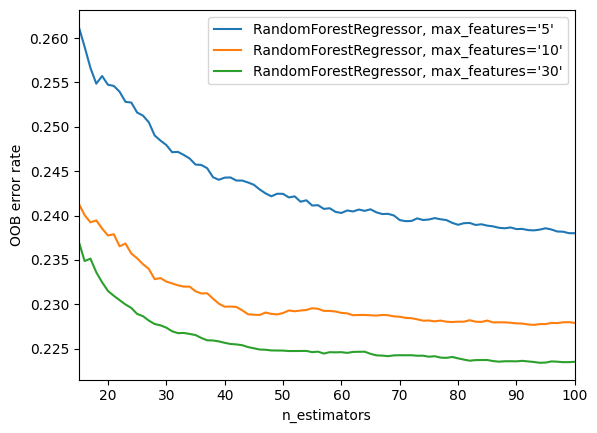

CPU times: user 21min 46s, sys: 5min 11s, total: 26min 57s
Wall time: 27min 7s


In [25]:
%%time

from collections import OrderedDict
RANDOM_STATE=20
ensemble_RF= [
    ("RandomForestRegressor, max_features='5'",
        RandomForestRegressor(warm_start=True,
                              max_features=5,
                              oob_score=True,
                              max_depth=5,
                              random_state=RANDOM_STATE)),
    ("RandomForestRegressor, max_features='10'",
        RandomForestRegressor(warm_start=True,
                              max_features=10,
                              oob_score=True,
                              max_depth=5,
                              random_state=RANDOM_STATE)),
    ("RandomForestRegressor, max_features='30'",
        RandomForestRegressor(warm_start=True,
                              max_features=30,
                              oob_score=True,
                              max_depth=5,
                              random_state=RANDOM_STATE))
]

# Map a Regressor name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_RF)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 100

for label, clf in ensemble_RF:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [26]:
RFR=RandomForestRegressor(n_estimators=50,max_features=30)  ## Para evitar sobreajuste
RFR.fit(X_train, y_train)

RandomForestRegressor(max_features=30, n_estimators=50)

In [27]:
pred_train=RFR.predict(X_train)
print("El R2 de entrenamiento es ",100*np.round(r2_score(y_train, pred_train),4), "%")
pred_test=RFR.predict(X_test)
print("El R2 de prueba es ",100*np.round(r2_score(y_test, pred_test),4), "%")

El R2 de entrenamiento es  89.64999999999999 %
El R2 de prueba es  63.59 %


Ranking de Variables:
1. feature 1700 (0.019345)
2. feature 1173 (0.016823)
3. feature 213 (0.013995)
4. feature 1376 (0.013810)
5. feature 452 (0.013019)
6. feature 1496 (0.012772)
7. feature 56 (0.012392)
8. feature 1533 (0.012320)
9. feature 860 (0.012041)
10. feature 549 (0.011330)
11. feature 632 (0.009672)
12. feature 2013 (0.009319)
13. feature 2150 (0.008977)
14. feature 1880 (0.008524)
15. feature 897 (0.008360)
16. feature 1040 (0.008188)
17. feature 1401 (0.008102)
18. feature 1941 (0.007931)
19. feature 129 (0.007793)
20. feature 1017 (0.007660)
21. feature 885 (0.007590)
22. feature 1125 (0.007522)
23. feature 506 (0.007312)
24. feature 224 (0.007310)
25. feature 669 (0.007294)
26. feature 1796 (0.007203)
27. feature 2349 (0.007067)
28. feature 1772 (0.006848)
29. feature 2373 (0.006740)
30. feature 1305 (0.006726)
31. feature 465 (0.006668)
32. feature 2169 (0.006628)
33. feature 1881 (0.006601)
34. feature 873 (0.006469)
35. feature 1569 (0.006467)
36. feature 2337 (0.00

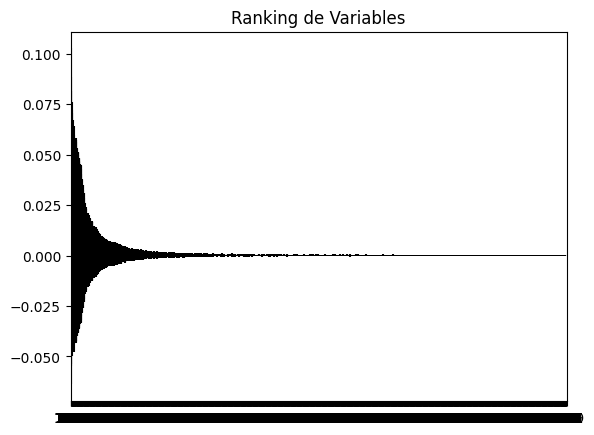

In [28]:
importancias = RFR.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFR.estimators_],
             axis=0)
indices = np.argsort(importancias)[::-1]

# Print the feature ranking
print("Ranking de Variables:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importancias[indices[f]]))

plt.figure()
plt.title("Ranking de Variables")
plt.bar(range(X.shape[1]), importancias[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [29]:
Impor=pd.DataFrame(importancias, index=X_train.columns)
Impor.sort_values(by=0,  ascending=False)

,0
xC142,1.934527e-02
yC98,1.682317e-02
yC18,1.399470e-02
xC115,1.381017e-02
xC38,1.301918e-02
...,...
nS161,1.499989e-06
yA104,1.476865e-06
yA132,1.112948e-06
yA19,7.925896e-07


In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix


array([[2760,  311],
       [ 270, 1321]])

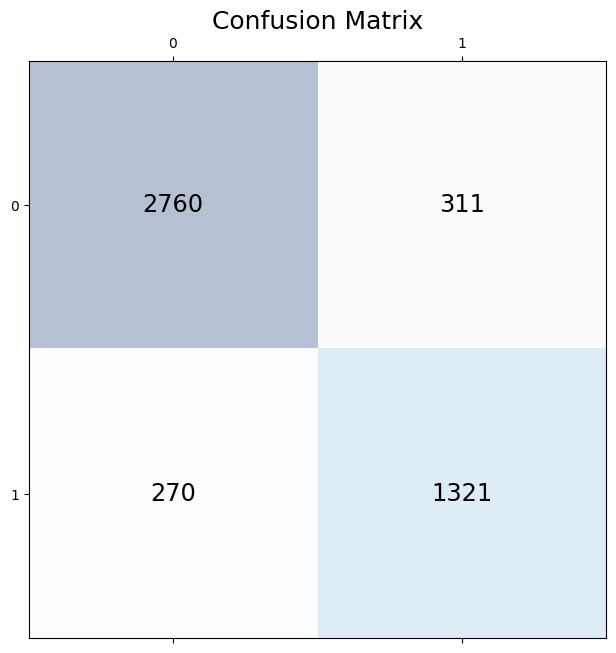

In [35]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

#plt.xlabel('Predictions', fontsize=18)
#plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()